Hunter Bennett | Glass Lab | Brain Aging Project | 12 Feb 2021  

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [2]:
dataDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/PU_1/WT/'
workingDirectory = '/home/h1bennet/brain_aging/results/00_Microglia_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [3]:
qc = ngs_qc(dataDirectory, 'atac')

/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/PU_1/WT//
./WT_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other
03_mouse_BL6_M_9week_PU1_ChIP_H3K27ac_1_JOS_20190809_CTTGTA,7042900.0,80.0,0.005611,2.172,2.726148e+09,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0
05_mouse_MPSIIIAhet_M_4month_PU1_ChIP_H3K27ac_1_AL_20200925_AGGTTATA_CAGTTCCG,6322557.0,81.0,0.002761,1.190,4.580000e-01,10165475.0,7501594.0,1467722.0,1196159.0,0.737948,0.882331,NaN,NaN,NaN
05_mouse_MPSIIIAhet_M_4month_PU1_ChIP_H3K27ac_2_AL_20200925_TCTGTTGG_TCGAATGG,7245475.0,80.0,0.003570,1.343,4.560000e-01,13473231.0,9720989.0,2012760.0,1739482.0,0.721504,0.870893,NaN,NaN,NaN
05_mouse_MPSIIIAhet_M_4month_PU1_ChIP_H3K27ac_3_AL_20201111_CTGCTTCC_GATAGATC,2764577.0,88.0,0.002688,2.650,4.490000e-01,10167435.0,7173124.0,1588453.0,1405858.0,0.705500,0.861729,NaN,NaN,NaN
06_mouse_MPSIIIAhet_M_P240_PU1_ChIP_H3K27ac_1_AL_20191226_ATTCCT,9898629.0,114.0,0.024253,6.680,2.726316e+09,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0
06_mouse_MPSIIIAhet_M_P240_PU1_ChIP_H3K27ac_2D_JOS_20191122_CTTGTA,4367243.0,82.0,0.001775,1.108,4.180000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06_mouse_MPSIIIAhet_M_P240_PU1_ChIP_H3K27ac_2_AL_20191122_CTTGTA,8782138.0,83.0,0.007779,2.415,2.726097e+09,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0
07_mouse_BL6_M_23month_PU1_ChIP_H3K27ac_1_AL_20201121_ATGTAAGT_ACTCTATG,11940205.0,185.0,0.004804,1.097,4.180000e-01,20380059.0,12957321.0,4517077.0,2905661.0,0.635784,0.857426,NaN,NaN,NaN
07_mouse_BL6_M_25month_PU1_ChIP_H3K27ac_1_JOS_20191018_ACTTGA,7872907.0,161.0,0.016188,5.606,2.726156e+09,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0
07_mouse_BL6_M_25month_PU1_ChIP_H3K27ac_2_JOS_20191018_AGTTCC,10370080.0,87.0,0.013013,3.421,2.725987e+09,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0


### Plot tag count distribution

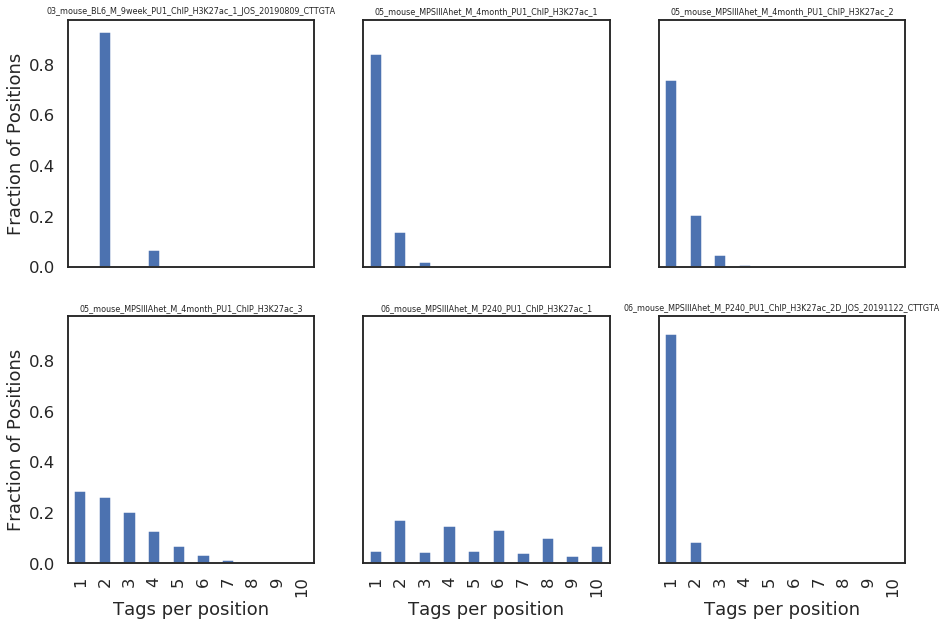

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|


In [6]:
# makeMultiWigHub.pl hrb_strains_h3k27ac_amln_30week mm10 -force -color \
# 77,175,74 77,175,74 77,175,74 77,175,74 \
# 55,126,184 55,126,184 55,126,184 55,126,184 \
# 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 228,26,28 \
# -d /gpfs/data01/glasslab/home/h1bennet/strains/data/H3K27Ac/AMLN_30week/*

 Based on the browser tracks and the qc for these samples this experiment will probably need to be redone.

# Find peaks

In [7]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./peak_files/ ]; then mkdir ./peak_files; fi

In [8]:
# set input directory
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        if '00_C57' in tagdir:
            inputdir='00_C57_Kupffer_input_AMLNDiet_20weeks_C579C_180423'
        elif '01_balb' in tagdir:
            inputdir='01_balbc_Kupffer_input_AMLNDiet_30weeks_Balb6AB_180423'
        elif '02_aj' in tagdir:
            inputdir='02_aj_Kupffer_input_AMLNDiet_30weeks_AJ15A_180423'
        
        find_peaks_fw = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir,
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_fixedwidth_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir, '-region',
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_variablewidth_peaks.tsv',
                          '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_fw))
        f.write(' '.join(find_peaks))

In [9]:
peak_stats={}

for td in np.sort(glob.glob('./peak_files/*H3K27Ac*')):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open(td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
./peak_files/00_C57_Kupffer_H3K27Ac_AMLNDiet_20weeks_C579A_180423_fixedwidth_peaks.tsv,17706.0,21.93,4281.0,4326.0,0.0
./peak_files/00_C57_Kupffer_H3K27Ac_AMLNDiet_20weeks_C579A_180423_variablewidth_peaks.tsv,20208.0,43.22,437.0,0.0,0.0
./peak_files/00_C57_Kupffer_H3K27Ac_AMLNDiet_20weeks_C579C_180423_fixedwidth_peaks.tsv,16945.0,19.10,4496.0,4473.0,0.0
./peak_files/00_C57_Kupffer_H3K27Ac_AMLNDiet_20weeks_C579C_180423_variablewidth_peaks.tsv,19756.0,38.52,460.0,0.0,0.0
./peak_files/01_balbc_Kupffer_H3K27Ac_AMLNDiet_30weeks_Balb14D_180423_fixedwidth_peaks.tsv,17919.0,20.97,3282.0,3847.0,0.0
./peak_files/01_balbc_Kupffer_H3K27Ac_AMLNDiet_30weeks_Balb14D_180423_variablewidth_peaks.tsv,19927.0,40.33,297.0,0.0,5.0
./peak_files/01_balbc_Kupffer_H3K27Ac_AMLNDiet_30weeks_Balb6AB_180423_fixedwidth_peaks.tsv,20618.0,32.93,3734.0,4758.0,2.0
./peak_files/01_balbc_Kupffer_H3K27Ac_AMLNDiet_30weeks_Balb6AB_180423_variablewidth_peaks.tsv,22712.0,65.33,409.0,0.0,7.0
./peak_files/02_aj_Kupffer_H3K27Ac_AMLNDiet_30weeks_AJ15A_180423_fixedwidth_peaks.tsv,11548.0,8.92,4819.0,3160.0,0.0
./peak_files/02_aj_Kupffer_H3K27Ac_AMLNDiet_30weeks_AJ15A_180423_variablewidth_peaks.tsv,13935.0,18.53,501.0,0.0,1.0


### Write to files

In [11]:
df.loc[df.index.str.contains('variable'), :].to_csv('./variablewidth_peak_table.txt', sep='\t')
df.loc[df.index.str.contains('fixed'), :].to_csv('./fixedwidth_peak_table.txt', sep='\t') 